![](https://i.ibb.co/vZrLqM2/kp108-ocenka-avto-s-probegom.jpg)


# Определение стоимости автомобилей

In [1]:
%%capture
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression, ElasticNet
import time
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from pycaret.regression import *
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(42)

In [3]:
!gdown --id 1RGZmVXLyqW8g4O4J0rt2sDsQ8Yllwh5D

Downloading...
From: https://drive.google.com/uc?id=1RGZmVXLyqW8g4O4J0rt2sDsQ8Yllwh5D
To: /content/autos.csv
44.4MB [00:00, 167MB/s]


In [4]:
df = pd.read_csv('/content/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df.drop(['DateCrawled', 'DateCreated', 'PostalCode', 'LastSeen', 'RegistrationMonth', 'NumberOfPictures'], axis=1, inplace=True)

In [6]:
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [7]:
exp = setup(df, target = 'Price', session_id = 42,
           normalize = True)

,Description,Value
0,session_id,42
1,Target,Price
2,Original Data,"(354369, 10)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(248058, 328)"


In [9]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1144.9856,3.442317e+06,1855.3481,0.8288,1.4019,9.5442
1,1155.5028,3.527361e+06,1878.1271,0.8260,1.4524,9.9861
2,1142.5664,3.345288e+06,1829.0129,0.8349,1.4700,10.0705
3,1142.6477,3.407048e+06,1845.8189,0.8314,1.4631,7.7326
4,1136.9257,3.376843e+06,1837.6187,0.8359,1.4508,7.2660
5,1138.4830,3.421118e+06,1849.6265,0.8314,1.4138,8.9920
6,1150.2933,3.469929e+06,1862.7746,0.8294,1.4269,9.5306
7,1151.3119,3.451466e+06,1857.8122,0.8320,1.4424,6.9229
8,1128.1337,3.282972e+06,1811.8974,0.8391,1.4556,9.9639
9,1126.2874,3.283379e+06,1812.0095,0.8388,1.3958,7.5964


In [11]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1053.9175,3.001296e+06,1732.4248,0.8508,1.3845,9.5604
1,1073.0955,3.183071e+06,1784.1163,0.8430,1.4343,9.2721
2,1050.6577,2.948762e+06,1717.1961,0.8545,1.4528,9.7876
3,1059.7351,3.075613e+06,1753.7426,0.8478,1.4416,6.9900
4,1052.8995,3.024839e+06,1739.2063,0.8530,1.4391,6.7969
5,1054.1778,3.070738e+06,1752.3521,0.8486,1.3985,8.6200
6,1059.7719,3.066493e+06,1751.1404,0.8492,1.4043,8.7285
7,1057.7571,3.018353e+06,1737.3409,0.8531,1.4203,6.4498
8,1045.8921,2.957375e+06,1719.7019,0.8551,1.4438,9.0448
9,1048.6527,2.942743e+06,1715.4425,0.8555,1.3799,7.7178


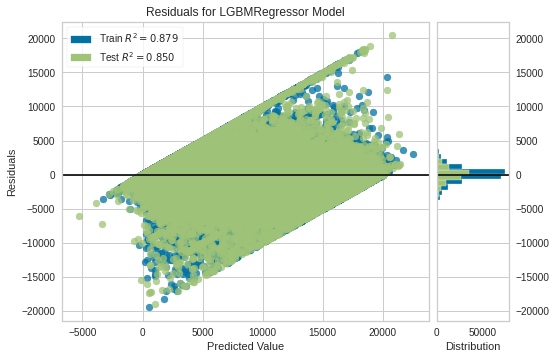

In [12]:
plot_model(tuned_lightgbm, plot = 'residuals')

In [13]:
save_model(tuned_lightgbm, model_name = '/content/deployment_05092021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.4,
                                max_depth=-1, min_child_samples=16,
                    